In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

# preprocess data

In [2]:
data = pd.read_csv('dataset.csv')

In [3]:
data.head(5)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [4]:
data.tail(5)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
1776,M4_48,194,16,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,...,0,0,0,0,3,186,0,0,0.0,1
1777,M4_41,198,17,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,...,0,0,0,0,2,124,0,0,0.0,1
1778,B0_162,201,34,utf-8,Apache/2.2.16 (Debian),8904.0,US,FL,15/02/1999 0:00,15/07/2015 0:00,...,2,6,6631,87,89,132181,6945,87,4.0,0
1779,B0_1152,234,34,ISO-8859-1,cloudflare-nginx,NaN,US,CA,1/04/1998 0:00,9/12/2016 0:00,...,0,0,0,0,0,0,0,0,0.0,0
1780,B0_676,249,40,utf-8,Microsoft-IIS/8.5,24435.0,US,Wisconsin,14/11/2008 0:00,20/11/2013 0:00,...,6,11,2314,25,28,3039,2776,25,6.0,0


In [5]:
data.shape

(1781, 21)

In [6]:
data.columns

Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

In [7]:
unique_url = data['URL'].unique().tolist()
print('samples: ',str(data.shape[0]))
print('unique: ',str(len(unique_url)))

samples:  1781
unique:  1781


In [8]:
data.describe()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
count,1781.000000,1781.000000,969.000000,1781.000000,1781.000000,1781.000000,1.781000e+03,1781.000000,1781.000000,1.781000e+03,1.781000e+03,1781.000000,1780.000000,1781.000000
mean,56.961258,11.111735,11726.927761,16.261089,5.472768,3.060640,2.982339e+03,18.540146,18.746210,1.589255e+04,3.155599e+03,18.540146,2.263483,0.121280
std,27.555586,4.549896,36391.809051,40.500975,21.807327,3.386975,5.605057e+04,41.627173,46.397969,6.986193e+04,5.605378e+04,41.627173,2.930853,0.326544
min,16.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,39.000000,8.000000,324.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,49.000000,10.000000,1853.000000,7.000000,0.000000,2.000000,6.720000e+02,8.000000,9.000000,5.790000e+02,7.350000e+02,8.000000,0.000000,0.000000
75%,68.000000,13.000000,11323.000000,22.000000,5.000000,5.000000,2.328000e+03,26.000000,25.000000,9.806000e+03,2.701000e+03,26.000000,4.000000,0.000000
max,249.000000,43.000000,649263.000000,1194.000000,708.000000,17.000000,2.362906e+06,1198.000000,1284.000000,2.060012e+06,2.362906e+06,1198.000000,20.000000,1.000000


In [9]:
data.describe(include = ['O'])

,URL,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE
count,1781,1781,1780,1781,1781,1781,1781
unique,1781,9,239,49,182,891,594
top,B0_643,UTF-8,Apache,US,CA,None,None
freq,1,676,386,1103,372,127,139


In [10]:
data.isnull().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                  0
WHOIS_UPDATED_DATE             0
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

## analysis CONTENT_LENGTH

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


count       969.000000
mean      11726.927761
std       36391.809051
min           0.000000
25%         324.000000
50%        1853.000000
75%       11323.000000
max      649263.000000
Name: CONTENT_LENGTH, dtype: float64

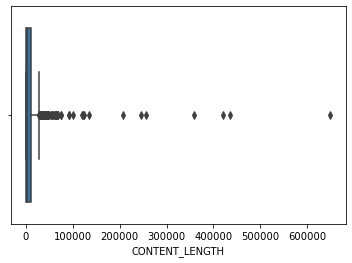

In [11]:
sns.boxplot(data.CONTENT_LENGTH)
data.CONTENT_LENGTH.describe()

## drop data where CONTENT_LENGTH>20000

In [12]:
data = data.drop(data[data['CONTENT_LENGTH']>20000].index.values)

In [13]:
data.isnull().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                  0
WHOIS_UPDATED_DATE             0
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

In [14]:
data['CONTENT_LENGTH'] = data.CONTENT_LENGTH.interpolate(method ='linear') #fill NaN values using interpolation method to get estmated values

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


count     1649.000000
mean      4432.146149
std       4747.970790
min          0.000000
25%        340.800000
50%       2516.000000
75%       7362.000000
max      19890.000000
Name: CONTENT_LENGTH, dtype: float64

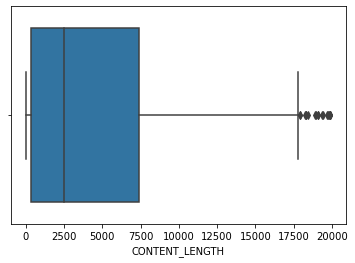

In [15]:
sns.boxplot(data.CONTENT_LENGTH)
data.CONTENT_LENGTH.describe()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CONTENT_LENGTH', ylabel='Density'>

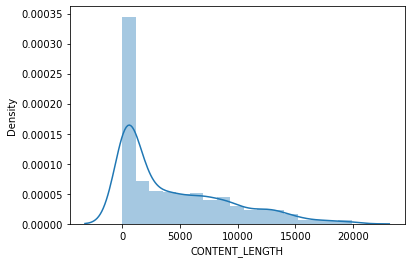

In [16]:
sns.distplot(data['CONTENT_LENGTH'])

In [17]:
drop_columns = ['SERVER','DNS_QUERY_TIMES']

In [18]:
data[drop_columns[0]].isnull()

0       False
1       False
2       False
3       False
5       False
        ...  
1775    False
1776    False
1777    False
1778    False
1779    False
Name: SERVER, Length: 1649, dtype: bool

In [19]:
drop_urls = []
for i in drop_columns:
    null_record = data[data[i].isnull()]['URL']
    try:
        drop_urls.append(null_record.item())
    except:
        pass

In [20]:
drop_urls #No null values

['B0_2134', 'B0_772']

In [21]:
for url in drop_urls:
    data = data[data['URL'] != url]

In [22]:
data.shape

(1647, 21)

In [23]:
data.WHOIS_COUNTRY.value_counts()

US                1014
None               289
CA                  69
ES                  63
AU                  33
PA                  21
GB                  19
JP                  11
CN                  10
IN                  10
CZ                   9
UK                   8
FR                   8
CH                   6
NL                   5
KR                   5
BS                   4
ru                   4
AT                   4
PH                   4
SE                   3
TR                   3
DE                   3
HK                   3
KY                   3
BE                   3
SC                   3
us                   3
UY                   2
KG                   2
SI                   2
Cyprus               2
NO                   2
IL                   2
RU                   2
UA                   2
se                   1
AE                   1
UG                   1
PK                   1
TH                   1
BY                   1
United Kingdom       1
BR         

In [24]:
data.WHOIS_COUNTRY = data.WHOIS_COUNTRY.replace("[u'GB'; u'UK']", 'UK')
data.WHOIS_COUNTRY = data.WHOIS_COUNTRY.replace('United Kingdom', 'UK')
data.WHOIS_COUNTRY = data.WHOIS_COUNTRY.replace('ru', 'RU')
data.WHOIS_COUNTRY = data.WHOIS_COUNTRY.replace('se', 'SE')
data.WHOIS_COUNTRY = data.WHOIS_COUNTRY.replace('us', 'US')
data.WHOIS_COUNTRY = data.WHOIS_COUNTRY.replace('NO', 'None')
data.WHOIS_COUNTRY = data.WHOIS_COUNTRY.replace('Cyprus', 'CY')

In [25]:
data.WHOIS_COUNTRY.value_counts()

US      1017
None     291
CA        69
ES        63
AU        33
PA        21
GB        19
JP        11
IN        10
CN        10
UK         9
CZ         9
FR         8
RU         6
CH         6
NL         5
KR         5
BS         4
AT         4
PH         4
SE         4
HK         3
TR         3
KY         3
BE         3
SC         3
DE         3
SI         2
KG         2
CY         2
UY         2
IL         2
UA         2
AE         1
UG         1
BY         1
TH         1
LU         1
IE         1
BR         1
LV         1
PK         1
Name: WHOIS_COUNTRY, dtype: int64

In [26]:
data.WHOIS_STATEPRO.unique()

array(['None', 'AK', 'Mahe', 'CO', 'FL', 'Kansas', 'Novosibirskaya obl.',
       'CA', 'Tennessee', 'Vi', 'OR', 'Texas', 'ALBERTA', 'PANAMA',
       'Arizona', 'TX', 'WI', 'Oregon', 'Andhra Pradesh', 'AB',
       'Tamil Nadu', 'VA', 'NY', 'quebec', 'MA', 'ON', 'New Mexico',
       'British Columbia', 'Massachusetts', 'California', 'bangkok',
       'WEST MIDLANDS', 'TEXAS', 'WC1N', 'Kentucky', 'MD', 'NEW YORK',
       'Washington', 'Colorado', 'PA', 'LA', 'WA', 'Queensland', 'MOSCOW',
       'P', 'NH', 'Pennsylvania', 'UTTAR PRADESH', 'NC', 'kireka', 'IL',
       'Missouri', 'Osaka', 'QC', 'Michigan', 'Maryland', 'Ontario',
       'South Carolina', 'Zhejiang', 'New York', 'QLD', 'NJ', 'GA', 'HR',
       'ab', 'Greater London', 'Illinois', '--', 'MO', 'Fukuoka', 'BC',
       'AL', 'Krasnoyarsk', 'MAINE', 'Virginia', 'MH', 'GRAND CAYMAN',
       'Austria', 'DE', 'shandong', 'AZ', 'UK', 'PRAHA', 'beijingshi',
       'liaoningsheng', 'North Carolina', 'OH', 'Manila', 'Utah', 'MI',
       '

In [27]:
data.isnull().sum() #cleaned

URL                          0
URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       0
CONTENT_LENGTH               0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
REMOTE_APP_PACKETS           0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64

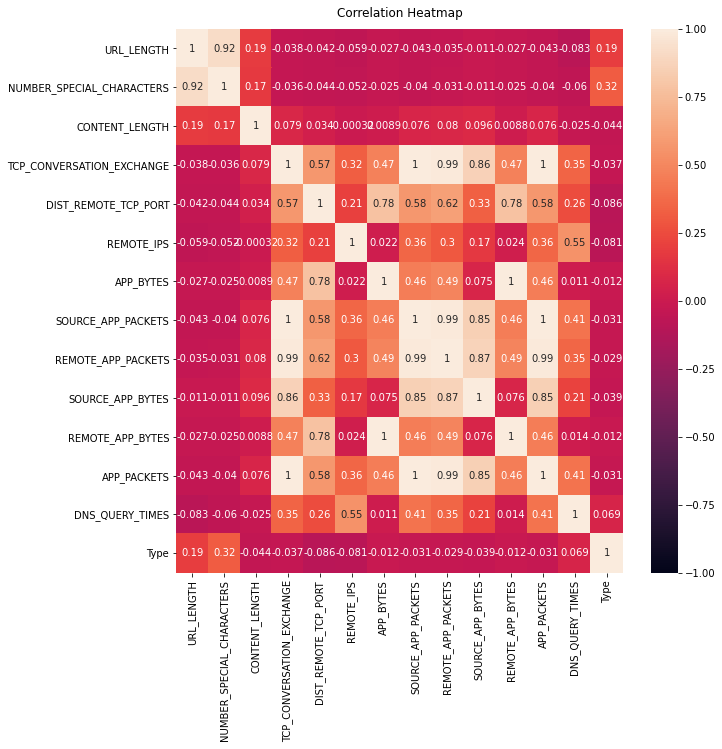

In [28]:
plt.figure(figsize=(10,10))
corr_mat = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
corr_mat.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    1432
1     215
Name: Type, dtype: int64

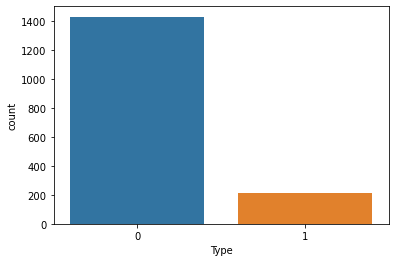

In [29]:
sns.countplot('Type', data=data)
data['Type'].value_counts()

In [30]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['WHOIS_COUNTRY']= label_encoder.fit_transform(data['WHOIS_COUNTRY'])
data['WHOIS_STATEPRO']= label_encoder.fit_transform(data['WHOIS_STATEPRO'])
data['CHARSET']=label_encoder.fit_transform(data['CHARSET'])
data.head(5)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,4,nginx,263.0,27,97,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,3,Apache/2.4.10,15087.0,27,97,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,5,Microsoft-HTTPAPI/2.0,324.0,27,97,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,1,nginx,162.0,40,4,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
5,B0_2064,18,7,3,nginx,253.5,32,69,3/08/2016 14:30,3/10/2016 3:45,...,6,9,894,11,13,838,894,11,0.0,0


In [31]:
data = pd.get_dummies(data.drop(['URL','SERVER','WHOIS_REGDATE','WHOIS_UPDATED_DATE'], axis=1))
data.head(5)

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,16,7,4,263.0,27,97,7,0,2,700,9,10,1153,832,9,2.0,1
1,16,6,3,15087.0,27,97,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,16,6,5,324.0,27,97,0,0,0,0,0,0,0,0,0,0.0,0
3,17,6,1,162.0,40,4,31,22,3,3812,39,37,18784,4380,39,8.0,0
5,18,7,3,253.5,32,69,11,6,9,894,11,13,838,894,11,0.0,0


In [32]:
X = data.drop(['Type'], axis=1)
y = data.Type

In [33]:
X.head(5)

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES
0,16,7,4,263.0,27,97,7,0,2,700,9,10,1153,832,9,2.0
1,16,6,3,15087.0,27,97,17,7,4,1230,17,19,1265,1230,17,0.0
2,16,6,5,324.0,27,97,0,0,0,0,0,0,0,0,0,0.0
3,17,6,1,162.0,40,4,31,22,3,3812,39,37,18784,4380,39,8.0
5,18,7,3,253.5,32,69,11,6,9,894,11,13,838,894,11,0.0


In [34]:
X.tail(5)

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES
1775,194,17,3,5893.5,13,17,0,0,0,0,0,3,186,0,0,0.0
1776,194,16,3,6897.0,13,17,0,0,0,0,0,3,186,0,0,0.0
1777,198,17,3,7900.5,13,17,0,0,0,0,0,2,124,0,0,0.0
1778,201,34,6,8904.0,40,34,83,2,6,6631,87,89,132181,6945,87,4.0
1779,234,34,1,8904.0,40,21,0,0,0,0,0,0,0,0,0,0.0


# Modeling

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
from scipy.interpolate import make_interp_spline
import math

In [37]:
rf=RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, bootstrap=True)
lr=LogisticRegression(random_state=2,penalty='l2',C=0.9,solver='liblinear',max_iter=120000)
svm = LinearSVC(class_weight={0: .9, 1: .1},max_iter=120000)
knn = KNeighborsClassifier() 
gbdt = GradientBoostingClassifier(random_state=10)
dt = DecisionTreeClassifier(random_state=10,criterion='gini')


rf_model = rf.fit(x_train,y_train)
lr_model = lr.fit(x_train,y_train)
svm_model = svm.fit(x_train,y_train)
knn_model = knn.fit(x_train, y_train)
gbdt_model = gbdt.fit(x_train, y_train)
dt_model = dt.fit(x_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [38]:
def print_report(model,model_name):
    target_names=['BENIGN', 'MALIGNANT']
    predict = model.predict(x_test)
    ac_score = metrics.accuracy_score(y_test, predict)
    cl_report = metrics.classification_report(y_test, predict,target_names=target_names)
    print('model name :'+model_name)
    print('ac score: '+ str(ac_score))
    print(cl_report)

In [39]:
models = [rf,lr,svm,knn,gbdt,dt]
model_names = ['random_forest','logistic regression','svm','knn','GBDT','Decision Tree']
for model,name in zip(models,model_names):
    print_report(model,name)

model name :random_forest
ac score: 0.9454545454545454
              precision    recall  f1-score   support

      BENIGN       0.95      0.99      0.97       282
   MALIGNANT       0.92      0.69      0.79        48

    accuracy                           0.95       330
   macro avg       0.93      0.84      0.88       330
weighted avg       0.94      0.95      0.94       330

model name :logistic regression
ac score: 0.896969696969697
              precision    recall  f1-score   support

      BENIGN       0.92      0.97      0.94       282
   MALIGNANT       0.72      0.48      0.57        48

    accuracy                           0.90       330
   macro avg       0.82      0.72      0.76       330
weighted avg       0.89      0.90      0.89       330

model name :svm
ac score: 0.8333333333333334
              precision    recall  f1-score   support

      BENIGN       0.91      0.89      0.90       282
   MALIGNANT       0.44      0.50      0.47        48

    accuracy          

# PR Curve

In [40]:
y_score = rf.predict_proba(x_test) 

In [41]:
from sklearn.metrics import precision_recall_curve

In [42]:
y_truth = np.array([[0,1] if i == 1 else [1,0] for i in y_test])

In [43]:
precision_recall_curve(y_truth[:, 0], y_score[:, 0])

(array([0.93687708, 0.94276094, 0.94897959, 0.95205479, 0.9676259 ,
        0.9739777 , 0.99215686, 0.99543379, 1.        ]),
 array([1.        , 0.9929078 , 0.9893617 , 0.9858156 , 0.95390071,
        0.92907801, 0.89716312, 0.77304965, 0.        ]),
 array([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))

In [44]:
y_test

165     0
1583    0
1745    0
583     1
837     0
       ..
1419    0
622     0
1714    1
1321    0
1172    0
Name: Type, Length: 330, dtype: int64

In [45]:
pos_prob_lr = lr.predict_proba(x_test)[:,1]
pos_prob_rf = rf.predict_proba(x_test)[:,1]
pos_prob_svm = svm._predict_proba_lr(x_test)[:,1]
pos_prob_knn = knn.predict_proba(x_test)[:,1]
pos_prob_gbdt = gbdt.predict_proba(x_test)[:,1]
pos_prob_dt = dt.predict_proba(x_test)[:,1]

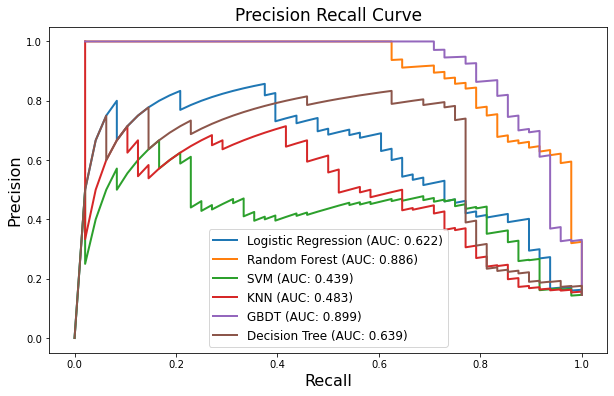

In [46]:
def get_pr(pos_prob,y_true):
    pos = y_true[y_true==1]
    threshold = np.sort(pos_prob)[::-1]
    y = y_true[pos_prob.argsort()[::-1]]
    recall = [] ; precision = []
    tp = 0 ; fp = 0
    auc = 0
    for i in range(len(threshold)):
        if y[i] == 1:
            tp += 1
            recall.append(tp/len(pos))
            precision.append(tp/(tp+fp))
            auc += (recall[i]-recall[i-1])*precision[i]
        else:
            fp += 1
            recall.append(tp/len(pos))
            precision.append(tp/(tp+fp))
    return precision,recall,auc

precision_lr,recall_lr,auc_lr = get_pr(pos_prob_lr,np.array(list(y_test)))
precision_rf,recall_rf,auc_rf = get_pr(pos_prob_rf,np.array(list(y_test)))
precision_svm,recall_svm,auc_svm = get_pr(pos_prob_svm,np.array(list(y_test)))
precision_knn,recall_knn,auc_knn = get_pr(pos_prob_knn,np.array(list(y_test)))
precision_gbdt,recall_gbdt,auc_gbdt = get_pr(pos_prob_gbdt,np.array(list(y_test)))
precision_dt,recall_dt,auc_dt = get_pr(pos_prob_dt,np.array(list(y_test)))

plt.figure(figsize=(10,6))
plt.plot(recall_lr, precision_lr,label="Logistic Regression (AUC: {:.3f})".format(auc_lr),linewidth=2)
plt.plot(recall_rf,precision_rf,label="Random Forest (AUC: {:.3f})".format(auc_rf),linewidth=2)
plt.plot(recall_svm,precision_svm,label="SVM (AUC: {:.3f})".format(auc_svm),linewidth=2)
plt.plot(recall_knn,precision_knn,label="KNN (AUC: {:.3f})".format(auc_knn),linewidth=2)
plt.plot(recall_gbdt,precision_gbdt,label="GBDT (AUC: {:.3f})".format(auc_gbdt),linewidth=2)
plt.plot(recall_dt,precision_dt,label="Decision Tree (AUC: {:.3f})".format(auc_dt),linewidth=2)
plt.xlabel("Recall",fontsize=16)
plt.ylabel("Precision",fontsize=16)
plt.title("Precision Recall Curve",fontsize=17)
plt.legend(fontsize=12)

Average precision score, macro-averaged over all classes: 0.94


Text(0.5, 1.0, 'Average precision score, macro-averaged over all classes: AP=0.937')

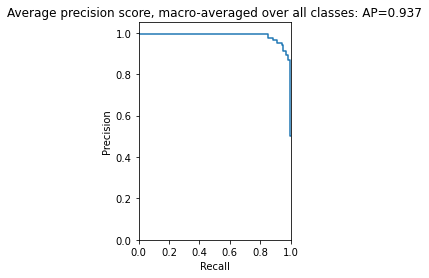

In [47]:
from sklearn.metrics import precision_recall_curve,average_precision_score
precision = dict()
recall = dict()
average_precision = dict()
y_score = rf.predict_proba(x_test) 
for i in range(2):
    precision[i], recall[i], _ = precision_recall_curve(y_truth[:, 0],
                                                        y_score[:, 0])
    average_precision[i] = average_precision_score(y_truth[:, 0], y_score[:, 0])

# A "macro-average": quantifying score on all classes jointly
precision["macro"], recall["macro"], _ = precision_recall_curve(y_truth.ravel(),
                                                                y_score.ravel())
average_precision["macro"] = average_precision_score(y_truth, y_score,
                                                     average="macro")
print('Average precision score, macro-averaged over all classes: {0:0.2f}'
      .format(average_precision["macro"]))

# plt.figure()
# 因为我自己的数据是5分类，所以我为了放在一张图上，设置了2X3的格子
iter_ = 1
plt.subplot(1, 2, iter_)	
iter_ += 1

plt.step(recall['macro'], precision['macro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, macro-averaged over all classes: AP={0:0.3f}'
        .format(average_precision["macro"]))